# Star Wars Survey

Does America realize 'The Empire Strikes Back' is clearly the best Star Wars movie? A team at FiveThirtyEight [surveyed](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) fans to find out. Let's take a look.

In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

There are definitely some columns that need cleaning here, or at least columns that don't include concise data. Let's remove any rows with invalid RespondentIDs to start.

In [3]:
star_wars['RespondentID'].isnull().value_counts()

False    1186
True        1
Name: RespondentID, dtype: int64

In [4]:
star_wars = star_wars[ star_wars['RespondentID'].notnull() ]
star_wars['RespondentID'].isnull().value_counts()

False    1186
Name: RespondentID, dtype: int64

Let's check the next columns

In [5]:
star_wars[star_wars.columns[1]].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars[star_wars.columns[2]].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

For the sake of simplicity later on, we can conver the yes/no answers into booleans True/False.

In [7]:
yes_no = {
    'Yes':True,
    'No':False
}

In [8]:
star_wars[star_wars.columns[1]] = star_wars[star_wars.columns[1]].map(yes_no)
star_wars[star_wars.columns[1]].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars[star_wars.columns[2]] = star_wars[star_wars.columns[2]].map(yes_no)
star_wars[star_wars.columns[2]].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### What have people even seen?
These next columns are a bit less intuitive. Let's explore them a bit.

In [10]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

As it turns out, this column is asking what Star Wars films the respondents have seen. Starting with Episode I: The Phantom Menace in column 3 and moving through episodes II, III, IV A, V, VI ending in column 8. It makes most sense to rename these columns so they are easier to work with and assume if the respondent didnt respond to the question, aka a value of NaN, then they didn't see the film.

In [11]:
import numpy as np
movies = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
}

for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(movies)

In [12]:
star_wars = star_wars.rename(columns={
        'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
        'Unnamed: 4': 'seen_2',
        'Unnamed: 5': 'seen_3',
        'Unnamed: 6': 'seen_4',
        'Unnamed: 7': 'seen_5',
        'Unnamed: 8': 'seen_6'
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### How Do They Feel?

Now that we can tell what people have watched, let's look at their rankings of the films in order. Their top pick is 1 and least favorite is 6. The next columns 10-15 will show us. Luckily, we just need to rename the columns to better show the data and make them a numeric rating.

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [15]:
star_wars = star_wars.rename(columns={
        'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
        'Unnamed: 10': 'ranking_2',
        'Unnamed: 11': 'ranking_3',
        'Unnamed: 12': 'ranking_4',
        'Unnamed: 13': 'ranking_5',
        'Unnamed: 14': 'ranking_6'
        })

star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [17]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

### Rankings
So far we have cleaned data and renamed columns to better describe what they represent. Just below we have the first plot showing the average rating of each movie overall, with the Episode I on the left and Episode VI on the right. Keep in mind fans ranked their favorite Episode as 1 so the shorter te bar the more fans liked the movie on average.

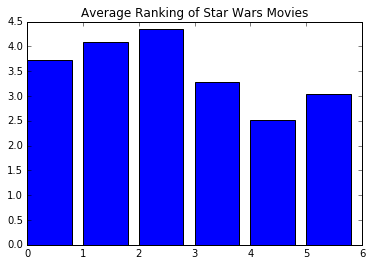

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.title('Average Ranking of Star Wars Movies')

This ranking makes sense for the most part. The original 3 films have higher rankings overall compared to the more recently released films. This could be for nostalgia's sake or simply because more people have seen the original movies.

### View Counts

In [26]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

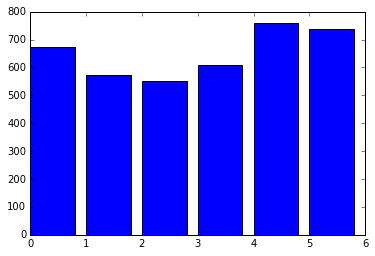

In [27]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

This plot is showing the number of views each film has had (amongst the respondents). Not surpisingly it shows the older films have gotten more views in general. This is likey because anyone that wants to watch star wars starts from the 'beginning' or at least the order they were originally released. The high number of views from the Phantom of Menace is likely a large hype from the 16 year hiatus from the release of Episode 6: Return of the Jedi.

These also correlate with the higher rankings amongst viewers. If some viewers had only seen some of the movies and not all, it is likely they watched the 'original' 3 rather than starting with the prequel trilogy.

### Ratings by Demographic: Gender

The following columns segment the data into two groups:
 - 'Do you consider yourself to be a fan of the Star Wars film franchise?'
 - 'Do you consider yourself to be a fan of the Star trek franchise?'
 - 'Gender'
 
 Let's explore gender to see if there is a difference, using the same analysis as before.

In [29]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

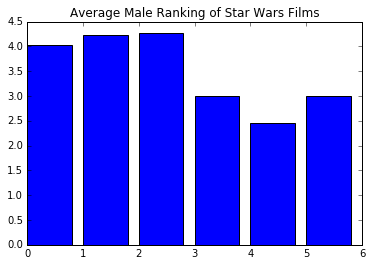

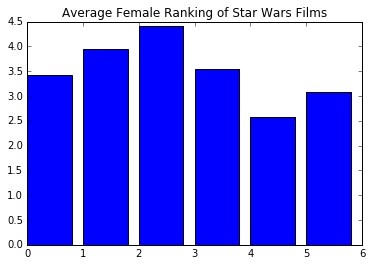

In [35]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.title("Average Male Ranking of Star Wars Films")
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.title("Average Female Ranking of Star Wars Films")
plt.show()

Not surprisingly, overall both genders had better raknings for the original 3 movies compared to the later releases. Something a bit surprising though is the gap between Episode 1. Females seemed to like that episode more than males.

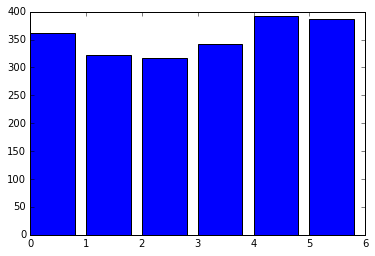

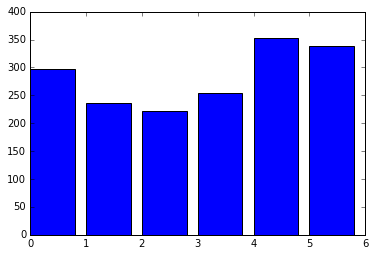

In [31]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

Similarly both genders saw the original films more than the recent films. However, females overall saw the first, fifth, and sixth releases of Star Wars much less than males. 